# House pricing prediction project
#### Let us import the libraries and read the house pricing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import os
os.chdir(r"C:\Users\danie\Downloads\KNNImputer and Iterative Imputer")
df=pd.read_csv("House_pricing_train data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Let's split our dataset into train and test data

In [2]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('SalePrice',1),df.SalePrice,test_size=0.2,random_state=0)

In [3]:
#We drop the 'id' column.The 'id' is simply a key and does not have an effect on price changes
x_train.drop(['Id'],axis=1,inplace=True)
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
618,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,...,260,0,NaN,NaN,NaN,0,7,2007,New,Partial
870,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
92,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
817,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
302,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


## Visualize Missing values
Heatmap showing the null values in our X_train dataset.
The null values are shown by the bright-yellow strikes

<AxesSubplot:>

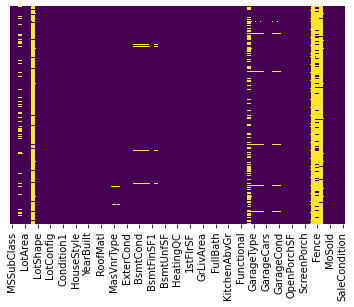

In [4]:
sns.heatmap(x_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Bar graph showing missing values with taller bars representing features with more missing values

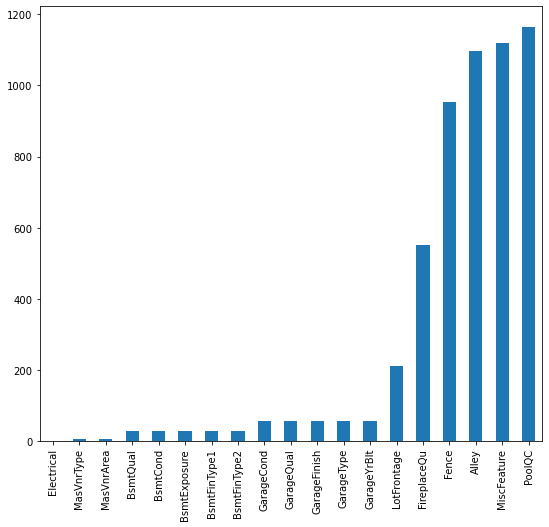

In [5]:
missing=x_train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(9,8))
missing.plot.bar()
plt.show()

In [6]:
#We display the information that helps us know how many null values and their datatypes
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    956 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          71 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

### The code results in the numerical colums only.
The 'SalePrice' is our target feature, we therefore drop it. We also exclude the 'Id' and 'YrSold' columns as they have no effect on our target feature

In [8]:
num_cols=[col for col in df.columns if (df[col].dtypes!='O')& (col!='SalePrice') & (col!='Id') & (col!='YrSold')]
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

### The code results in the text columns only.

In [9]:
cat_cols=[col for col in df.columns if (df[col].dtypes=='O')& (col!='YrSold')]
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# The good and scalable approach
The code fills up all missing/null values for both text and numerical values, converts all the text features into numbers, then transforms and scales up all the numerical values for easy analysis.   

In [19]:
pp_num=Pipeline([
    ('num_imp',SimpleImputer(strategy='median',add_indicator=False)),
    ('rob_num',RobustScaler())
])
pp_cat=Pipeline([
    ('cat_imp',SimpleImputer(strategy='constant',add_indicator=False,fill_value='missing')),
    ('ohe_cat',OneHotEncoder(sparse=False,handle_unknown='ignore')) #setting "sparse=False" means OneHoteEncoder will return an array, but not a sparse matrix
])

In [20]:
from sklearn.impute import MissingIndicator

In [21]:
ct=ColumnTransformer([ 
    ('mi',MissingIndicator(),x_train.columns),
    ('pp_num',pp_num,num_cols),
    ('pp_cat',pp_cat,cat_cols)
])

In [22]:
xt=ct.fit_transform(x_train)

In [23]:
pd.DataFrame(xt).head()

,0,1,2,3,4,5,6,7,8,9,...,307,308,309,310,311,312,313,314,315,316
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
491,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
459,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
279,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
655,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Family


In [25]:
ct.transform(x_test)

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [26]:
pipe_final=Pipeline([
    ('ct_step',ct),
    ('model',DecisionTreeClassifier())
])

### Fitting a model to our sample data, the model in this case is "Decision Trees Classifier"

In [27]:
pipe_final.fit(x_train,y_train)

Pipeline(steps=[('ct_step',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       '...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'Exte

### We are using our evaluation/test data to predict the sales price of the housing.Then convert the price predicted into a dataframe format.

In [28]:
SalePrice_pred=pd.DataFrame(pipe_final.predict(x_test))
SalePrice_pred

,0
0,315000
1,119000
2,128900
3,220000
4,94500
...,...
287,270000
288,501837
289,169000
290,97000


### File saving
Saving our target data file i.e the predicted price file as "House prediction_Result" in a csv format
SalePrice_pred.to_csv('House prediction_Result.csv') within the working directory.

### Changing our working directory

In [30]:
os.chdir("E:\KAGGLE\KAGGLE\classified data\Feature Engineering_1")

### Listing all the encoded and transformed features

In [32]:
pipe_final.named_steps['ct_step'].named_transformers_['pp_cat']

Pipeline(steps=[('cat_imp',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ohe_cat',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [33]:
pipe_final.named_steps['ct_step'].named_transformers_['pp_cat'].named_steps

{'cat_imp': SimpleImputer(fill_value='missing', strategy='constant'),
 'ohe_cat': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [34]:
pipe_final.named_steps['ct_step'].named_transformers_['pp_cat'].named_steps['ohe_cat']

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [35]:
pipe_final.named_steps['ct_step'].named_transformers_['pp_cat'].named_steps['ohe_cat'].get_feature_names()

array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_Grvl', 'x2_Pave', 'x2_missing', 'x3_IR1', 'x3_IR2',
       'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low', 'x4_Lvl',
       'x5_AllPub', 'x5_NoSeWa', 'x6_Corner', 'x6_CulDSac', 'x6_FR2',
       'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev', 'x8_Blmngtn',
       'x8_Blueste', 'x8_BrDale', 'x8_BrkSide', 'x8_ClearCr',
       'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards', 'x8_Gilbert',
       'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes', 'x8_NPkVill',
       'x8_NWAmes', 'x8_NoRidge', 'x8_NridgHt', 'x8_OldTown', 'x8_SWISU',
       'x8_Sawyer', 'x8_SawyerW', 'x8_Somerst', 'x8_StoneBr', 'x8_Timber',
       'x8_Veenker', 'x9_Artery', 'x9_Feedr', 'x9_Norm', 'x9_PosA',
       'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe', 'x9_RRNn',
       'x10_Artery', 'x10_Feedr', 'x10_Norm', 'x10_PosA', 'x10_PosN',
       'x10_RRAe', 'x11_1Fam', 'x11_2fmCon', 'x11_Duplex', 'x11_Twnhs',
       'x11_TwnhsE', 'x12_1

   ###                                Daniel Wekesa Masibo
   
   Use the link below to access more of my projects on Github repository
      https://github.com/Daniel86-hub/House_pricing_prediction-project